## Project Assignment A (Analysis of the data)

In [1]:
import pandas as pd

In [2]:
ts_data = pd.read_csv('data/taylor_swift_discography_updated.csv', sep=';', index_col = 'ID')
ts_data.head()

,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,...,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
ID,,,,,,,,,,,,,,,,,,,,,
0,Fortnight (feat. Post Malone),Synth Pop,Single,228965,Post Malone,No,0,648525069,1,The Tortured Poets Department: The Anthology,...,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,1.53e-05,0.0961,-10.976,0.0308,192.004,0.281
1,The Tortured Poets Department,Synth Pop,B-Side,293048,No,No,0,206954130,6,The Tortured Poets Department: The Anthology,...,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.0,0.1260,-8.441,0.0255,110.259,0.292
2,My Boy Only Breaks His Favorite Toys,Synth Pop,B-Side,203801,No,No,0,238016975,7,The Tortured Poets Department: The Anthology,...,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.0,0.3020,-7.362,0.0269,97.073,0.481
3,Down Bad,R&B,B-Side,261228,No,No,0,318375377,2,The Tortured Poets Department: The Anthology,...,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,"1,00E-06",0.0946,-10.412,0.0748,159.707,0.168
4,"So Long, London",Synth Pop,B-Side,262974,No,No,0,253712712,4,The Tortured Poets Department: The Anthology,...,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.00264,0.0816,-11.388,0.3220,160.218,0.248


In [11]:
#print the number of albums and their names
print('Number of albums:', ts_data['album'].nunique())

Number of albums: 29


In [3]:
#print size of the dataset
rows, columns = ts_data.shape
print('Number of rows: ', rows)
print('Number of columns: ', columns)

Number of rows:  577
Number of columns:  27


In [4]:
# print songs with repeated names and their count
print(ts_data['track_name'].value_counts())


track_name
illicit affairs                         3
Holy Ground                             3
mad woman                               3
epiphany                                3
betty                                   3
                                       ..
I Forgot That You Existed               1
Cruel Summer                            1
Lover                                   1
The Man                                 1
Teardrops on My Guitar - Pop Version    1
Name: count, Length: 361, dtype: int64


In [5]:
# print name of columns
print(ts_data.columns)

Index(['track_name', 'track_musical_genre', 'track_type', 'duration_ms',
       'feature', 'track_videoclip', 'videoclip_views', 'spotify_streams',
       'spotify_global_peak', 'album', 'track_number', 'album_musical_genre',
       'album_type', 'release_date', 'album_physical_sales', 'track_lyrics',
       'track_theme', 'uri', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


In [6]:
ts_data['release_date'].head()

ID
0    19/4/2024
1    19/4/2024
2    19/4/2024
3    19/4/2024
4    19/4/2024
Name: release_date, dtype: object

In [7]:
#transform the column 'release_date' to datetime
ts_data['release_date'] = pd.to_datetime(ts_data['release_date'], format='%d/%m/%Y')

In [8]:
#transform the column 'spotify_streams' to int
#first you have to replace the . by nothing
ts_data['spotify_streams'] = ts_data['spotify_streams'].str.replace('.', '')
ts_data['spotify_streams'] = pd.to_numeric(ts_data['spotify_streams'], errors='coerce')

In [9]:
ts_data['spotify_streams']

ID
0      648525069
1      206954130
2      238016975
3      318375377
4      253712712
         ...    
572    328676348
573     49912790
574     34315147
575     25204096
576     32775607
Name: spotify_streams, Length: 577, dtype: int64

<Axes: xlabel='album'>

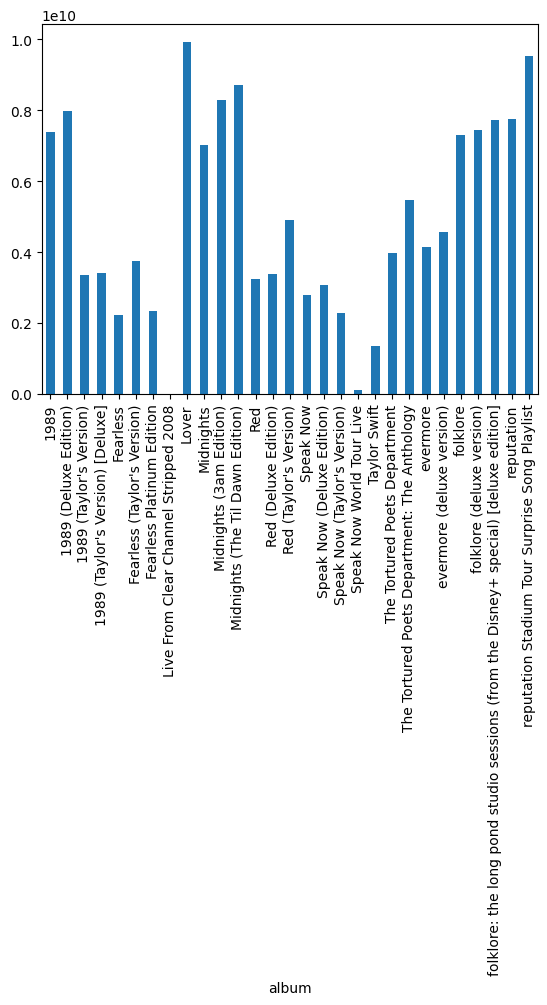

In [13]:
#number of streams per album
ts_data.groupby('album')['spotify_streams'].sum().plot(kind='bar')

In [14]:
# total number of spotify streams
ts_data['spotify_streams'].sum()

np.int64(143460832279)